# Plot the error ellipse for a given covariance matrix of two parameters

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

In [3]:
def get_error_ellipse(cov, center, nstd, **kwargs):
    """
    return error ellipse patch representing the covariance matrix
    cov: 2x2 covariance matrix
    centre: mean values (mu1, mu2)
    nstd: number of standard deviations
    """

    # eigenvalues and eigenvectors of the covariance matrix
    # (in ascending order of the eigenvalue)
    eigvals, eigvecs = np.linalg.eigh(cov)
   
    # x, y component of the eigenvector (eigvecs[:,1]) with the larger eigenvalue
    x, y = eigvecs[:,1][0], eigvecs[:,1][1]
    
    # angle of the ellipse    
    theta = np.arctan2(y, x)
    
    # width = 2 times radius in x, height = 2 times radius in y 
    height, width = 2 * nstd * np.sqrt(eigvals)
        
    return Ellipse(xy=center, width=width, height=height,
                   angle=np.degrees(theta), **kwargs)

In [4]:
# define mean values and a covariance matrix
a = 0.
b = 0.
V = np.array([[1**2, -0.8], [-0.8, 1**2]])
print(V)

[[ 1.  -0.8]
 [-0.8  1. ]]


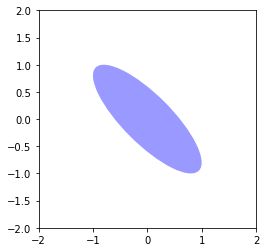

In [5]:
fig, ax = plt.subplots()
el = get_error_ellipse(V, (a, b), 1, fc='blue', alpha=0.4)
ax.add_artist(el)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_aspect(1)
plt.show()